In [22]:
import numpy as np
import camb
import matplotlib.pyplot as plt
from camb import model, initialpower
from scipy.integrate import solve_ivp
import scienceplots
plt.style.use(['science', 'bright'])
plt.rcParams.update({
    # Figure
    'figure.figsize': (6.8, 4.2),
    'figure.dpi': 200,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.05,

    # Lines and markers
    'lines.linewidth': 1.5,
    'lines.markersize': 5,

    # Font
    'font.size': 9,
    'axes.labelsize': 9,
    'axes.titlesize': 10,
    'legend.fontsize': 8,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,

    # Axes
    'axes.linewidth': 1.0,
    'axes.grid': True,
    'grid.alpha': 0.3,

    # Ticks
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 4,
    'ytick.major.size': 4,

    # Legend
    'legend.frameon': False,

    # Text rendering (LaTeX)
    'text.usetex': True,               # Optional: needs LaTeX installed
    'text.latex.preamble': r'\usepackage{amsmath,amssymb}',  # Optional
})

## Pregunta 5

Para esta pregunta resolveremos un sistema de ecuaciones diferenciales:

$$
\dot{\delta} = -(1+w) \left( \theta - 3 \dot{\phi}\right) - \mathcal{H} \left( \frac{\delta p}{\rho} - w \delta\right)
$$
$$
\dot{\theta} = -\mathcal{H}(1 - 3 w) \theta - \frac{\dot{w}}{1 + w} \theta + \frac{1}{1+w} \frac{k^2 \delta p}{\rho} + k^2 \psi - k^2 \sigma
$$


Para el caso de componente de materia con $w = \delta p= \sigma = 0$

$$
\dot{\delta }= - \left( \theta - 3 \dot{\phi}\right)
$$
$$
\dot{\theta} = \mathcal{H}\theta + k^2 \psi
$$
Teniendo $\phi = \psi$
$$
\dot{\delta }= - \left( \theta - 3 \dot{\psi}\right)
$$
$$
\dot{\theta} = -\mathcal{H}\theta + k^2 \psi
$$


Ademas por la Eq. $0-0$ y la ecuacion $i-0$ de Einstein:
$$
k^2 \phi  + 3 \mathcal{H} (\mathcal{H} \psi + \dot{\phi}) = -4\pi Ga^2 \delta \rho
$$
$$
k^2(\dot{\phi} + \mathcal{H}\psi) = 4\pi G a^2 (1+w)\bar{\rho} \theta
$$

Que al remplazar una en la otra se obtiene:

$$
k^2 \theta  = -4 \pi G a^2\left(\delta \rho + \frac{3 \mathcal{H}}{k^2}(1 + w)\bar{\rho}\theta\right)
$$

Teniendo que estamos interesados en la la componente de materia

$$
k^2\phi = -4 \pi G a^2 \left( \delta \rho_m + \frac{3 \mathcal{H}}{k^2}\bar{\rho}_m \theta_m\right)
$$
Si reescribimos todo usando $\delta_m$ en lugar de $\delta \rho_m$

$$
k^2 \phi = -\frac{3}{2} a^2 H^2 \Omega_m \left( \delta_m + \frac{3 \mathcal{H}}{k^2} \theta_m \right)
$$

Luego de retomando la ecuacion $i-0$ de einstein

$$
k^2(\dot{\phi} + \mathcal{H}\phi) = 4 \pi G a^2 (1 +w) \bar{\rho} \theta
$$
$$
k^2(\dot{\phi} + \mathcal{H}\phi) = 4 \pi G a^2  \bar{\rho}_m \theta_m
$$

$$
\dot{\phi}  = \frac{3 \mathcal{H}^2}{2k^2} \Omega_m \theta_m - \mathcal{H}\phi
$$


De todo esto tenemos las siguientes ecuaiones a considerar:

$$
\dot{\delta }_m= - \left( \theta_m - 3 \dot{\phi}\right)
$$
$$
\dot{\theta}_m = -\mathcal{H}\theta_m + k^2 \phi
$$
$$
k^2 \phi = -\frac{3}{2} a^2 H^2 \Omega_m \left( \delta_m + \frac{3 \mathcal{H}}{k^2} \theta_m \right)
$$
$$
\dot{\phi}  = \frac{3 \mathcal{H}^2}{2k^2} \Omega_m \theta_m - \mathcal{H}\phi
$$

Luego realizamos un cambio de variable para las derivadas, es decir pasaremos de derivadas en funcion de tiempo conforme $\tau$, a derivadas respecto a el factor de escala $a$.

$$
\delta_m'= - \left( \frac{\theta_m}{a^2 H} - 3 \phi'\right)
$$
$$
\theta_m' = -\frac{\theta_m}{a} + \frac{k^2 \phi}{a^2 H}
$$
$$
k^2 \phi = -\frac{3}{2} a^2 H^2 \Omega_m \left( \delta_m + \frac{3 \mathcal{H}}{k^2} \theta_m \right)
$$
$$
\phi'  = \frac{3 H}{2k^2} \Omega_m \theta_m - \frac{\phi}{a}
$$


In [23]:
# Primero definimos el parametro de Hubble
w_de = -1
omega_r = 1e-4
omega_m = 0.3
omega_lambda =  (1 - omega_r - omega_m)
h0 = 67

def H_a(a):
     return (h0)*(omega_r*a**(-4) + omega_m*a**(-3) + omega_lambda*a**(-3*(1+w_de)))**(0.5)

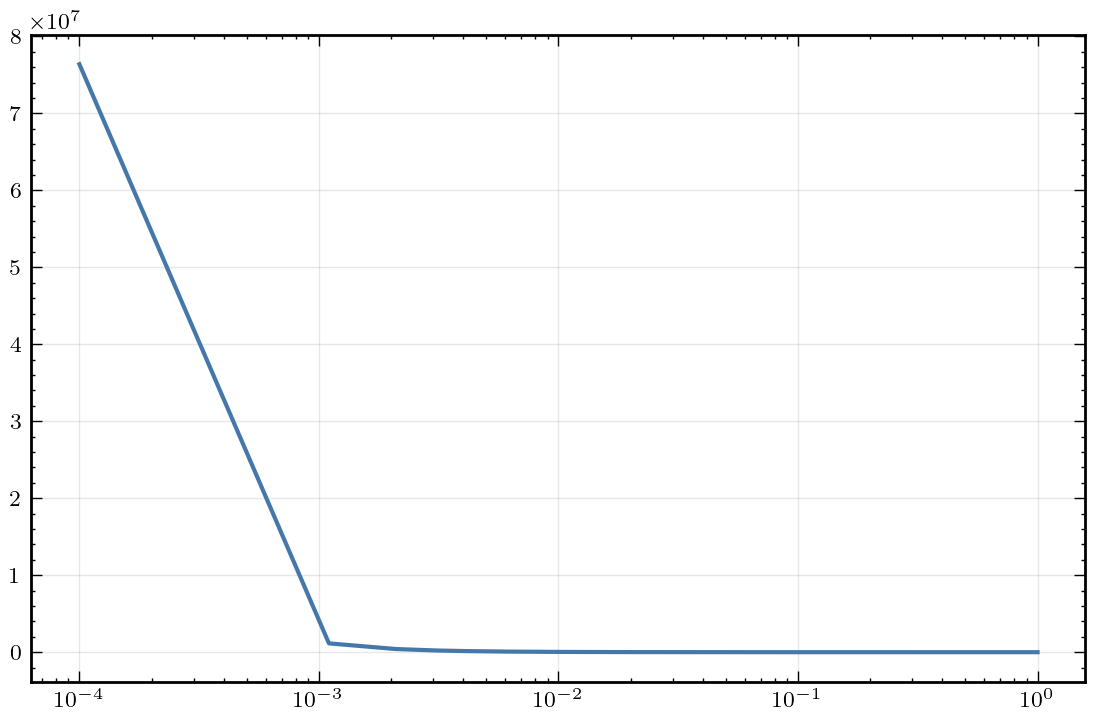

In [24]:
a = np.linspace(1e-4, 1,1000)
# Aqui ploteamos el paramtro de Hubble en tiempo cosmico y en tiempo conforme
plt.semilogx(a, H_a(a))

In [35]:
def phi(a, k ,init_val):

    delta_m, theta_m  = init_val
    

    term1 = -1.5 *(a*H_a(a)/k)**2 
    term2 = omega_m*(a**(-3))*(delta_m/a + (3*H_a(a)/k**2)*theta_m )

    return term1*term2



def dphida(a, k, init_val):

    delta_m, theta_m = init_val
    term1 = 1.5*H_a(a)/(2 *k**2)
    term2 = omega_m*theta_m*a**(-3)

    return term1*term2 - phi(a,k,init_val)/a

def rhs_edos(a, k, init_val):
    delta_m, theta_m = init_val
    phi_f = phi(a, k , init_val)
    dphida_f = dphida(a, k, init_val)

    out = [
        -theta_m/(a**2 * H_a(a)) + 3*dphida_f,
        -theta_m/a + k**2 * phi_f/(a**2*H_a(a))
    ]

    return out

In [56]:
a_ini, a_end = 1e-4, 1.0
X0 = [a_ini, - H_a(a_ini)*a_ini**2 ]

k_list = np.array([10**(-3), 10**(-1), 1, 50])

X_sol = {}

for k in k_list:
    X_sol[k] = solve_ivp(
        fun = lambda a, X: rhs_edos(a, k, X),
        t_span= (a_ini, a_end),
        y0 = X0,
        method = 'BDF',
        dense_output= True,
        rtol = 1e-7,
        atol=1e-10
    )


In [57]:
for i in k_list[1]:
    print(X_sol[i])


TypeError: 'numpy.float64' object is not iterable

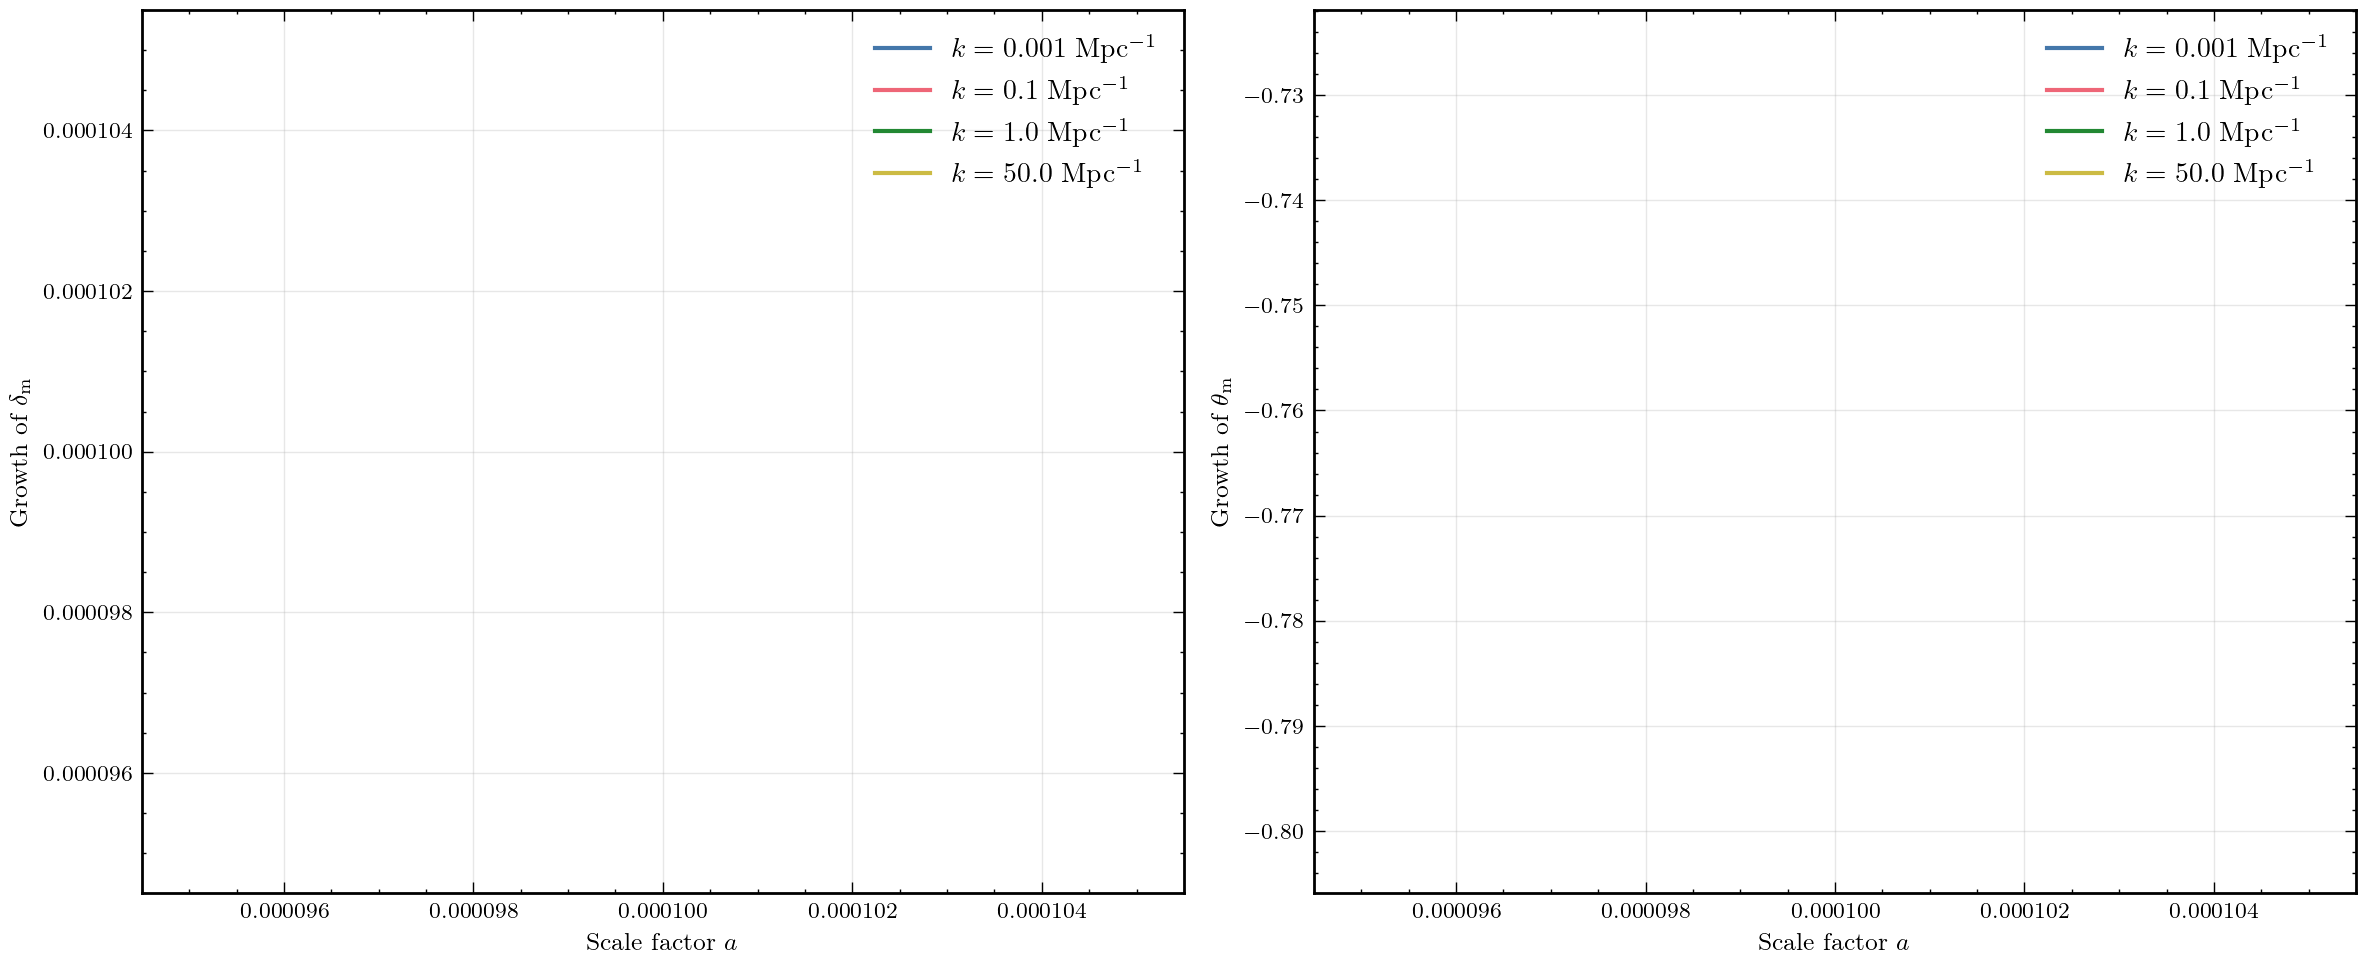

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

for idx, k in enumerate(k_list):
    ax[0].plot(X_sol[k].t, X_sol[k].y[0], label=fr'$k={k}$ Mpc'r'$^{-1}$')
    ax[1].plot(X_sol[k].t, X_sol[k].y[1], label=fr'$k={k}$ Mpc'r'$^{-1}$')

# Axis labels
ax[0].set_xlabel(r'Scale factor $a$')
ax[1].set_xlabel(r'Scale factor $a$')
ax[0].set_ylabel(r'Growth of $\delta_\mathrm{m}$')
ax[1].set_ylabel(r'Growth of $\theta_\mathrm{m}$')

# Legends
ax[0].legend(fontsize=10)
ax[1].legend(fontsize=10)

# Layout
fig.tight_layout()

## Pregunta 6

### a)

In [110]:
pars = camb.set_params(H0 = 67)
pars2 = camb.set_params(H0= 67, omnuh2 = 0)

pars.set_matter_power(redshifts=[0.0, 0.8, 1.2], kmax = 2.0)
pars2.set_matter_power(redshifts=[0.0, 0.8, 1.2], kmax = 2.0)

results = camb.get_results(pars)
results2 = camb.get_results(pars2)

kh, z, pk  = results.get_matter_power_spectrum(minkh= 1e-4, maxkh= 1,npoints=200)
kh2, z2, pk2  = results2.get_matter_power_spectrum(minkh= 1e-4, maxkh= 1,npoints=200)



Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


In [111]:
print(results.get_Omega('nu'),results2.get_Omega('nu'))

0.0014365483859376585 0.0


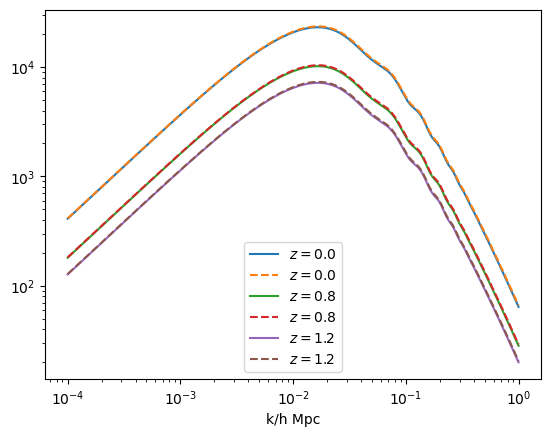

In [112]:
for i, (redshift) in enumerate(z):
    plt.loglog(kh, pk[i,:], label = rf'$z = {redshift}$')
    plt.loglog(kh2, pk2[i,:],'--' ,label = rf'$z = {redshift}$')

plt.xlabel('k/h Mpc')
plt.legend()


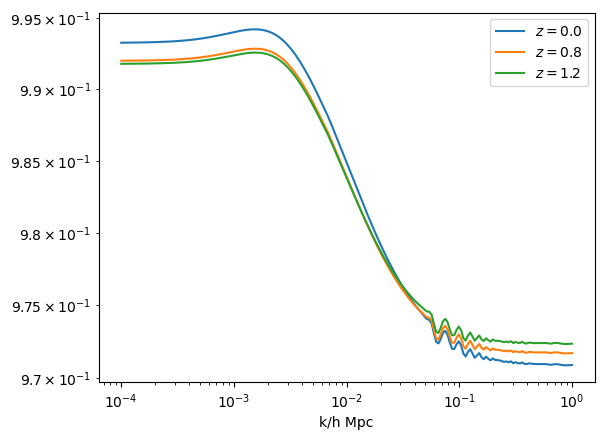

In [113]:
for i, (redshift) in enumerate(z):
    plt.loglog(kh, pk[i,:]/pk2[i,:], label = rf'$z = {redshift}$')

plt.xlabel('k/h Mpc')
plt.legend()


### b)

In [121]:
pars = camb.set_params(H0=67,lmax=3000)

results =camb.get_results(pars)

powers = results.get_cmb_power_spectra(pars , CMB_unit='muK')
powers.keys()

dict_keys(['total', 'unlensed_scalar', 'unlensed_total', 'lensed_scalar', 'tensor', 'lens_potential'])

(2.0, 3000.0)

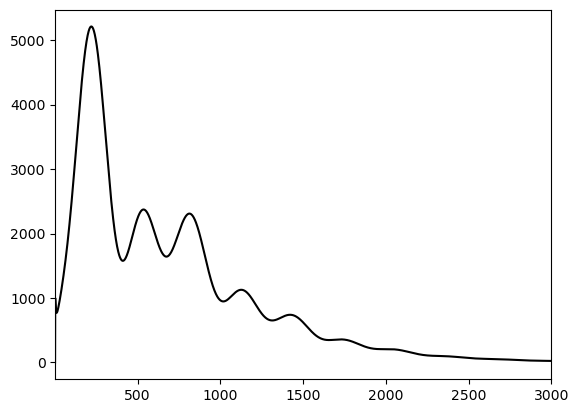

In [122]:
totcl = powers['total']
ls = np.arange(totcl.shape[0])


plt.plot(ls, totcl[:,0], color = 'k')
plt.xlim(2,3000)


Para mostrar como cambia el angular power spectrum con la seleccion de parametros cosmologicos definimos

In [143]:
def power_spectra(ombh2=0.022, omch2=0.122, omk =0):
    pars = camb.set_params(H0=67,lmax=3000, ombh2=ombh2, omch2=omch2,omk  = omk)

    results =camb.get_results(pars)

    powers = results.get_cmb_power_spectra(pars , CMB_unit='muK')

    total = powers['total']

    return total


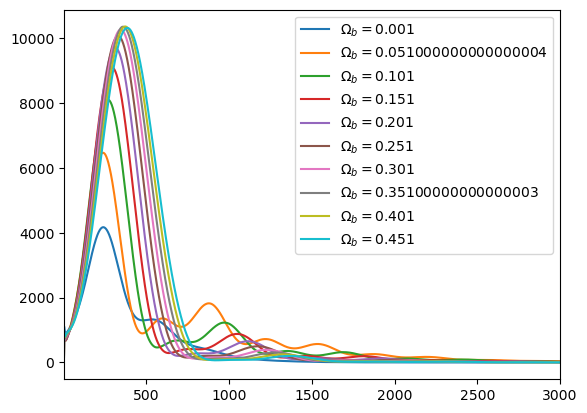

In [141]:
omeb_list = np.arange(0.001,0.5,0.05)
for omeb in omeb_list:
    total = power_spectra(ombh2=omeb)
    ls = np.arange(total.shape[0])
    plt.plot(ls, total[:,0], label = rf'$\Omega_b = {omeb}$')

plt.xlim(2,3000)
plt.legend()

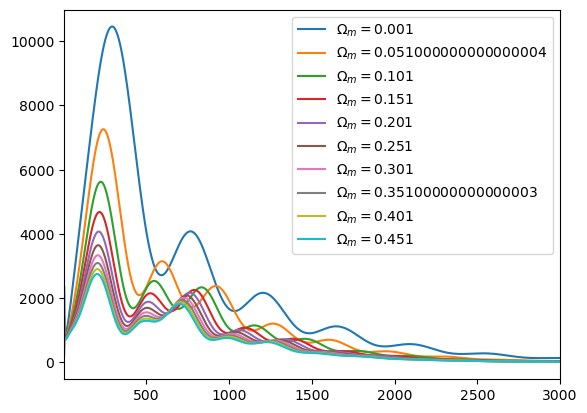

In [144]:
omem_list = np.arange(0.001,0.5,0.05)
for omem in omem_list:
    total = power_spectra(omch2=omem)
    ls = np.arange(total.shape[0])
    plt.plot(ls, total[:,0], label = rf'$\Omega_m = {omem}$')

plt.xlim(2,3000)
plt.legend()

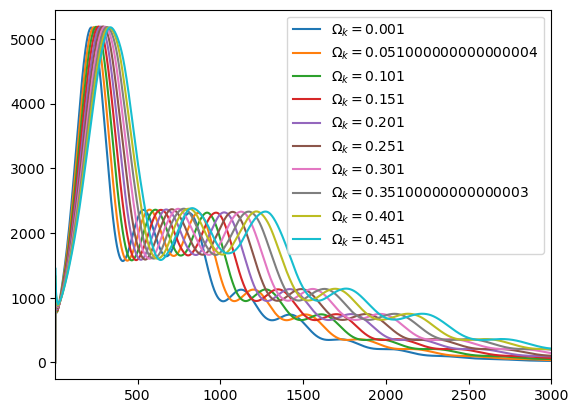

In [145]:
omk_list = np.arange(0.001,0.5,0.05)
for omek in omk_list:
    total = power_spectra(omk=omek)
    ls = np.arange(total.shape[0])
    plt.plot(ls, total[:,0], label = rf'$\Omega_k = {omek}$')

plt.xlim(2,3000)
plt.legend()